In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit
# plt.rcParams['text.usetex'] = True

In [2]:
file = "../data/SSCURVES(1-61).xlsx"
xls = pd.ExcelFile(file)

In [3]:
def strain_stress_exponential(strain, G0, l):
    """
    Args:
        strain: the strain
        G0: linear modulus
        l: 1/critical strain at which the curve deflects up
    """
    return G0 / l * (np.exp(l * strain) - 1)

First we need to take a look if our data is eligible for the following function:
$$
\sigma=\frac{G_0}{\lambda}\left(e^{\lambda \gamma} - 1\right).
$$
For $\lambda\gamma \ll 1$, $\sigma = G_0\gamma$, which can be verified by a Taylor expansion. $\gamma$ is the strain, $\sigma$ is the stress.

100%|███████████████████████████████████████████████████████████████| 63/63 [00:04<00:00, 14.26it/s]


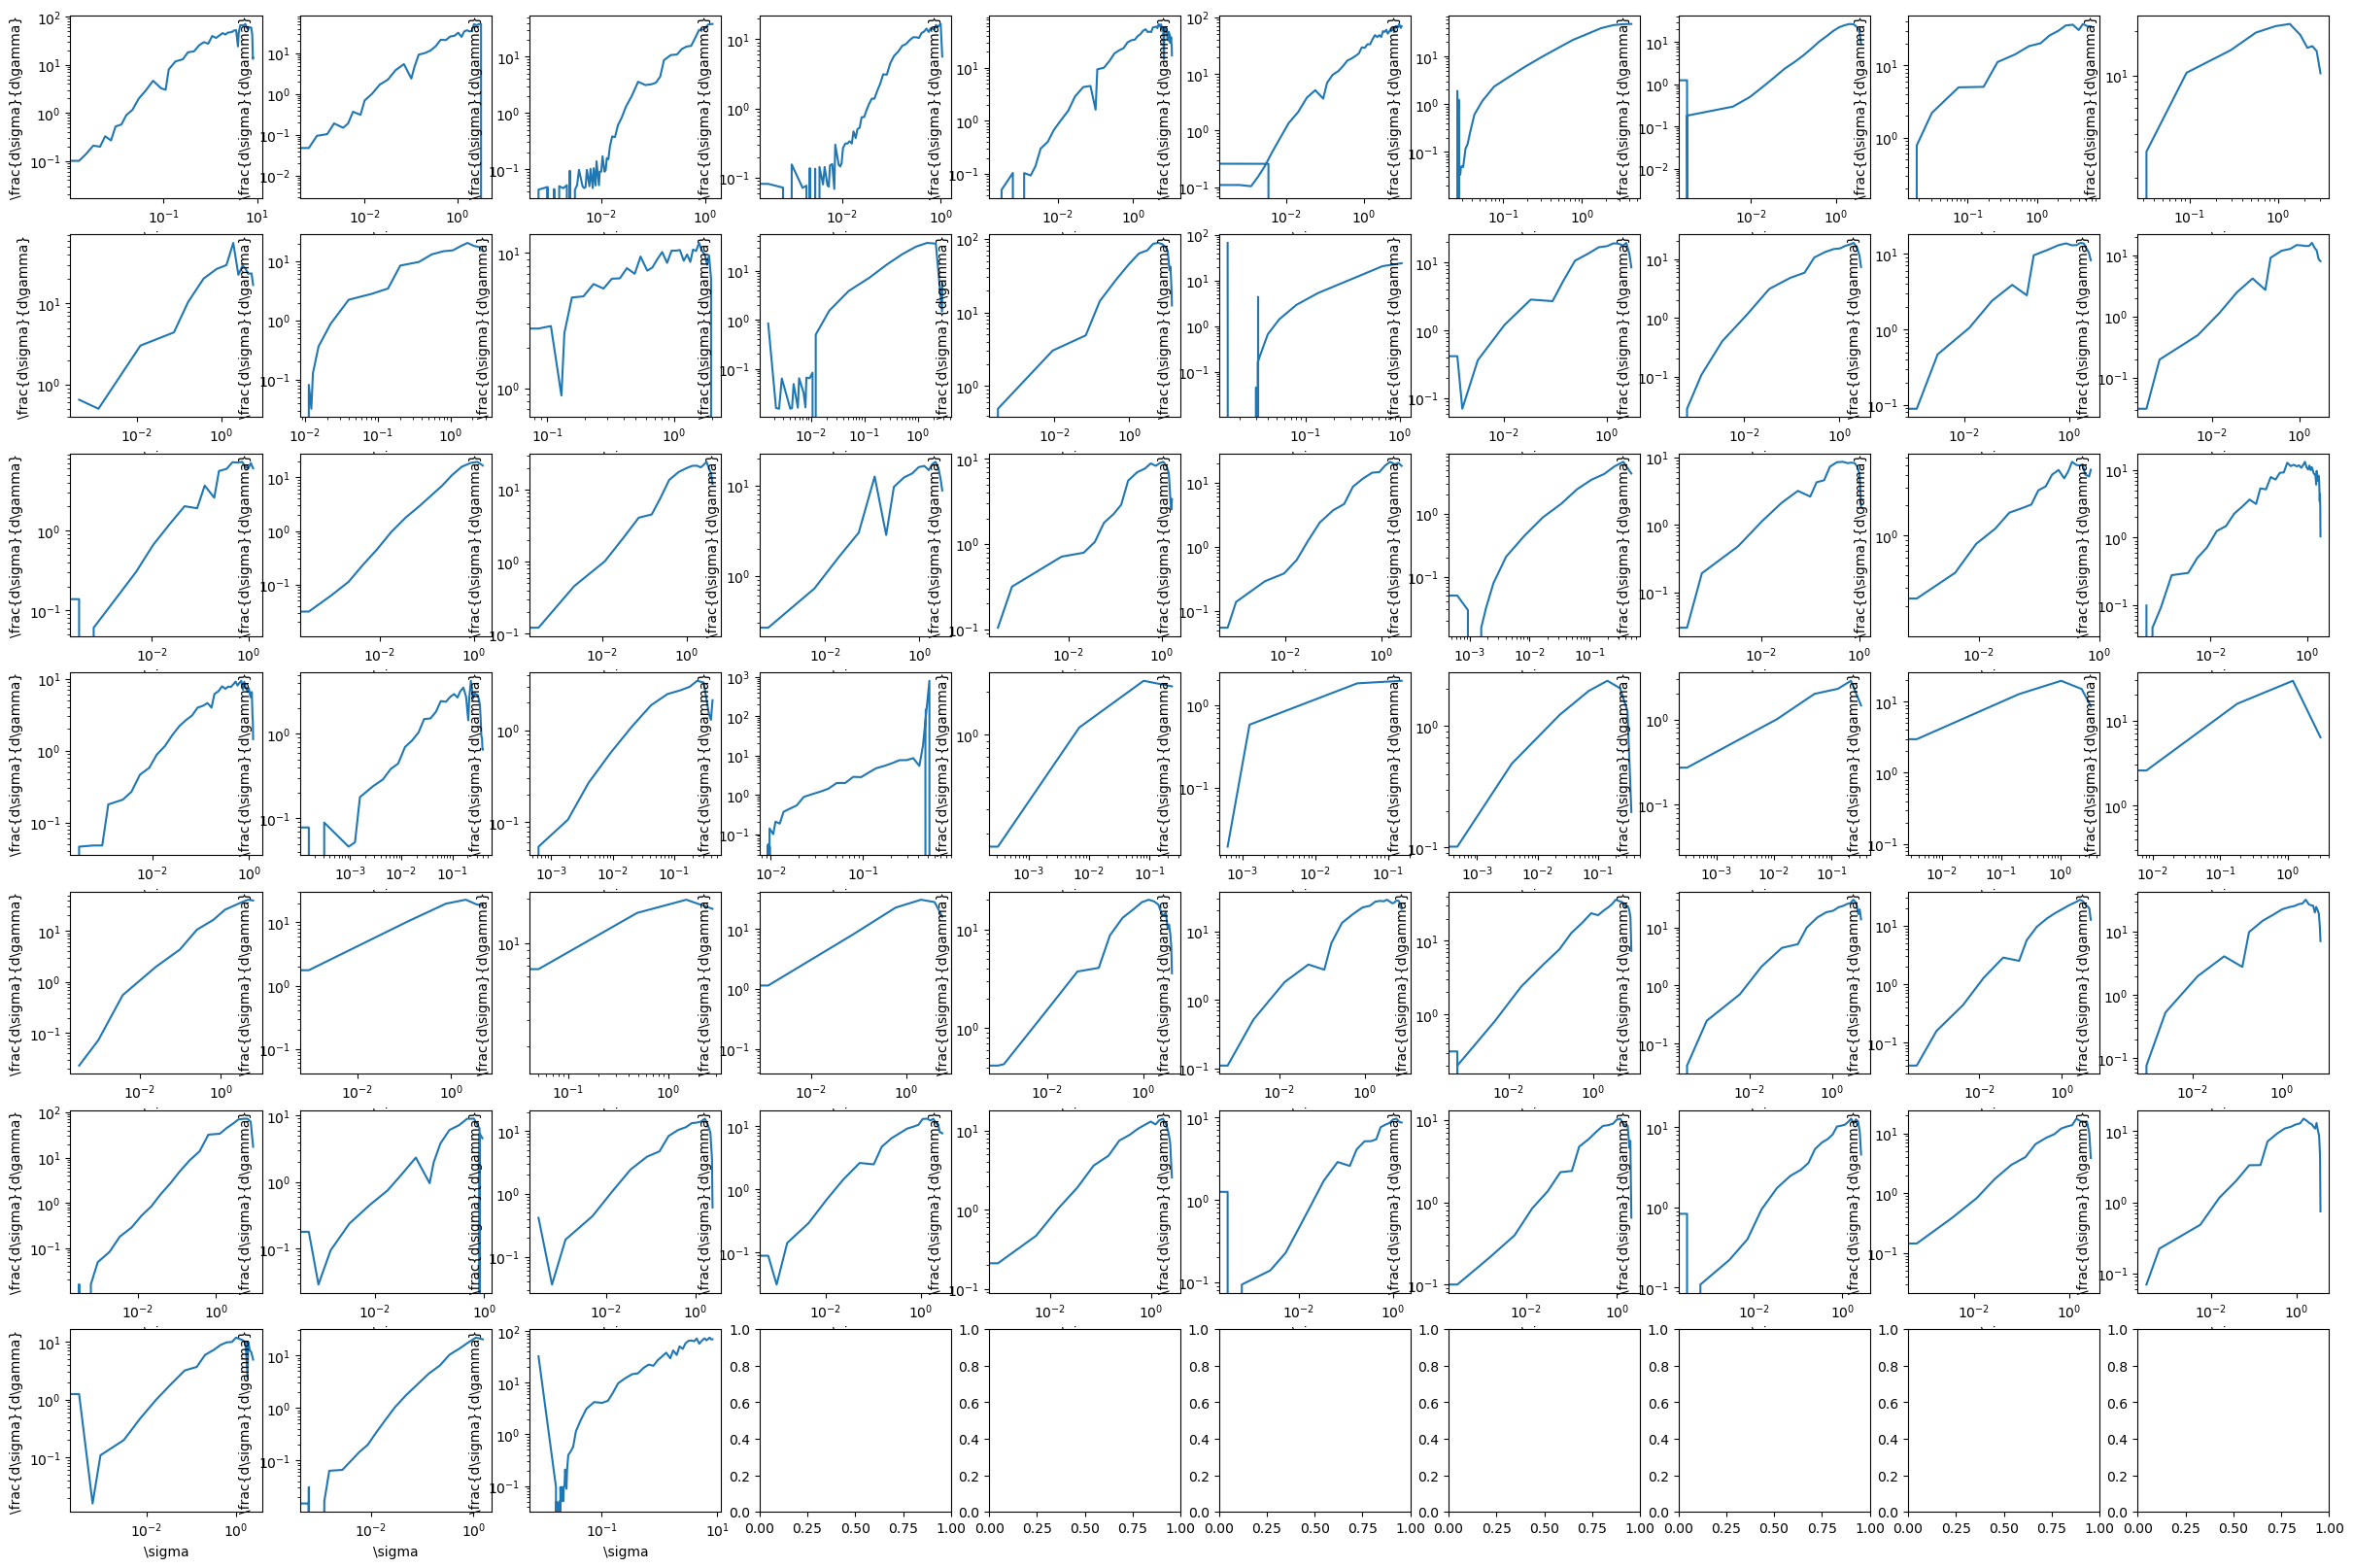

In [4]:
fig, axs = plt.subplots(7, 10, figsize=(30,20))
for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])
    df = df.groupby("Strain", as_index=False).agg({'Stress': 'mean'})

    strain_data = df['Strain']
    stress_data = df['Stress']
    
    derivative = np.diff(stress_data) / np.diff(strain_data)

    ax.loglog(stress_data[:-1], derivative)
    ax.set_xlabel(r"\sigma")
    ax.set_ylabel(r"\frac{d\sigma}{d\gamma}")

plt.show()

100%|███████████████████████████████████████████████████████████████| 63/63 [00:07<00:00,  8.74it/s]


    index            G0          l
0       1  5.997266e-06  12.401406
1       2  2.605530e-11  21.247297
2       3  4.688951e-18  31.296493
3       4  1.506283e-13  24.022929
4       5  1.044840e-03   8.332547
..    ...           ...        ...
58     59  1.562346e-04   8.904855
59     60  5.250615e-03   5.854540
60     61  1.691349e-03   6.482401
61     62  9.081755e-11  18.358694
62    555  1.616728e-07  14.717918

[63 rows x 3 columns]


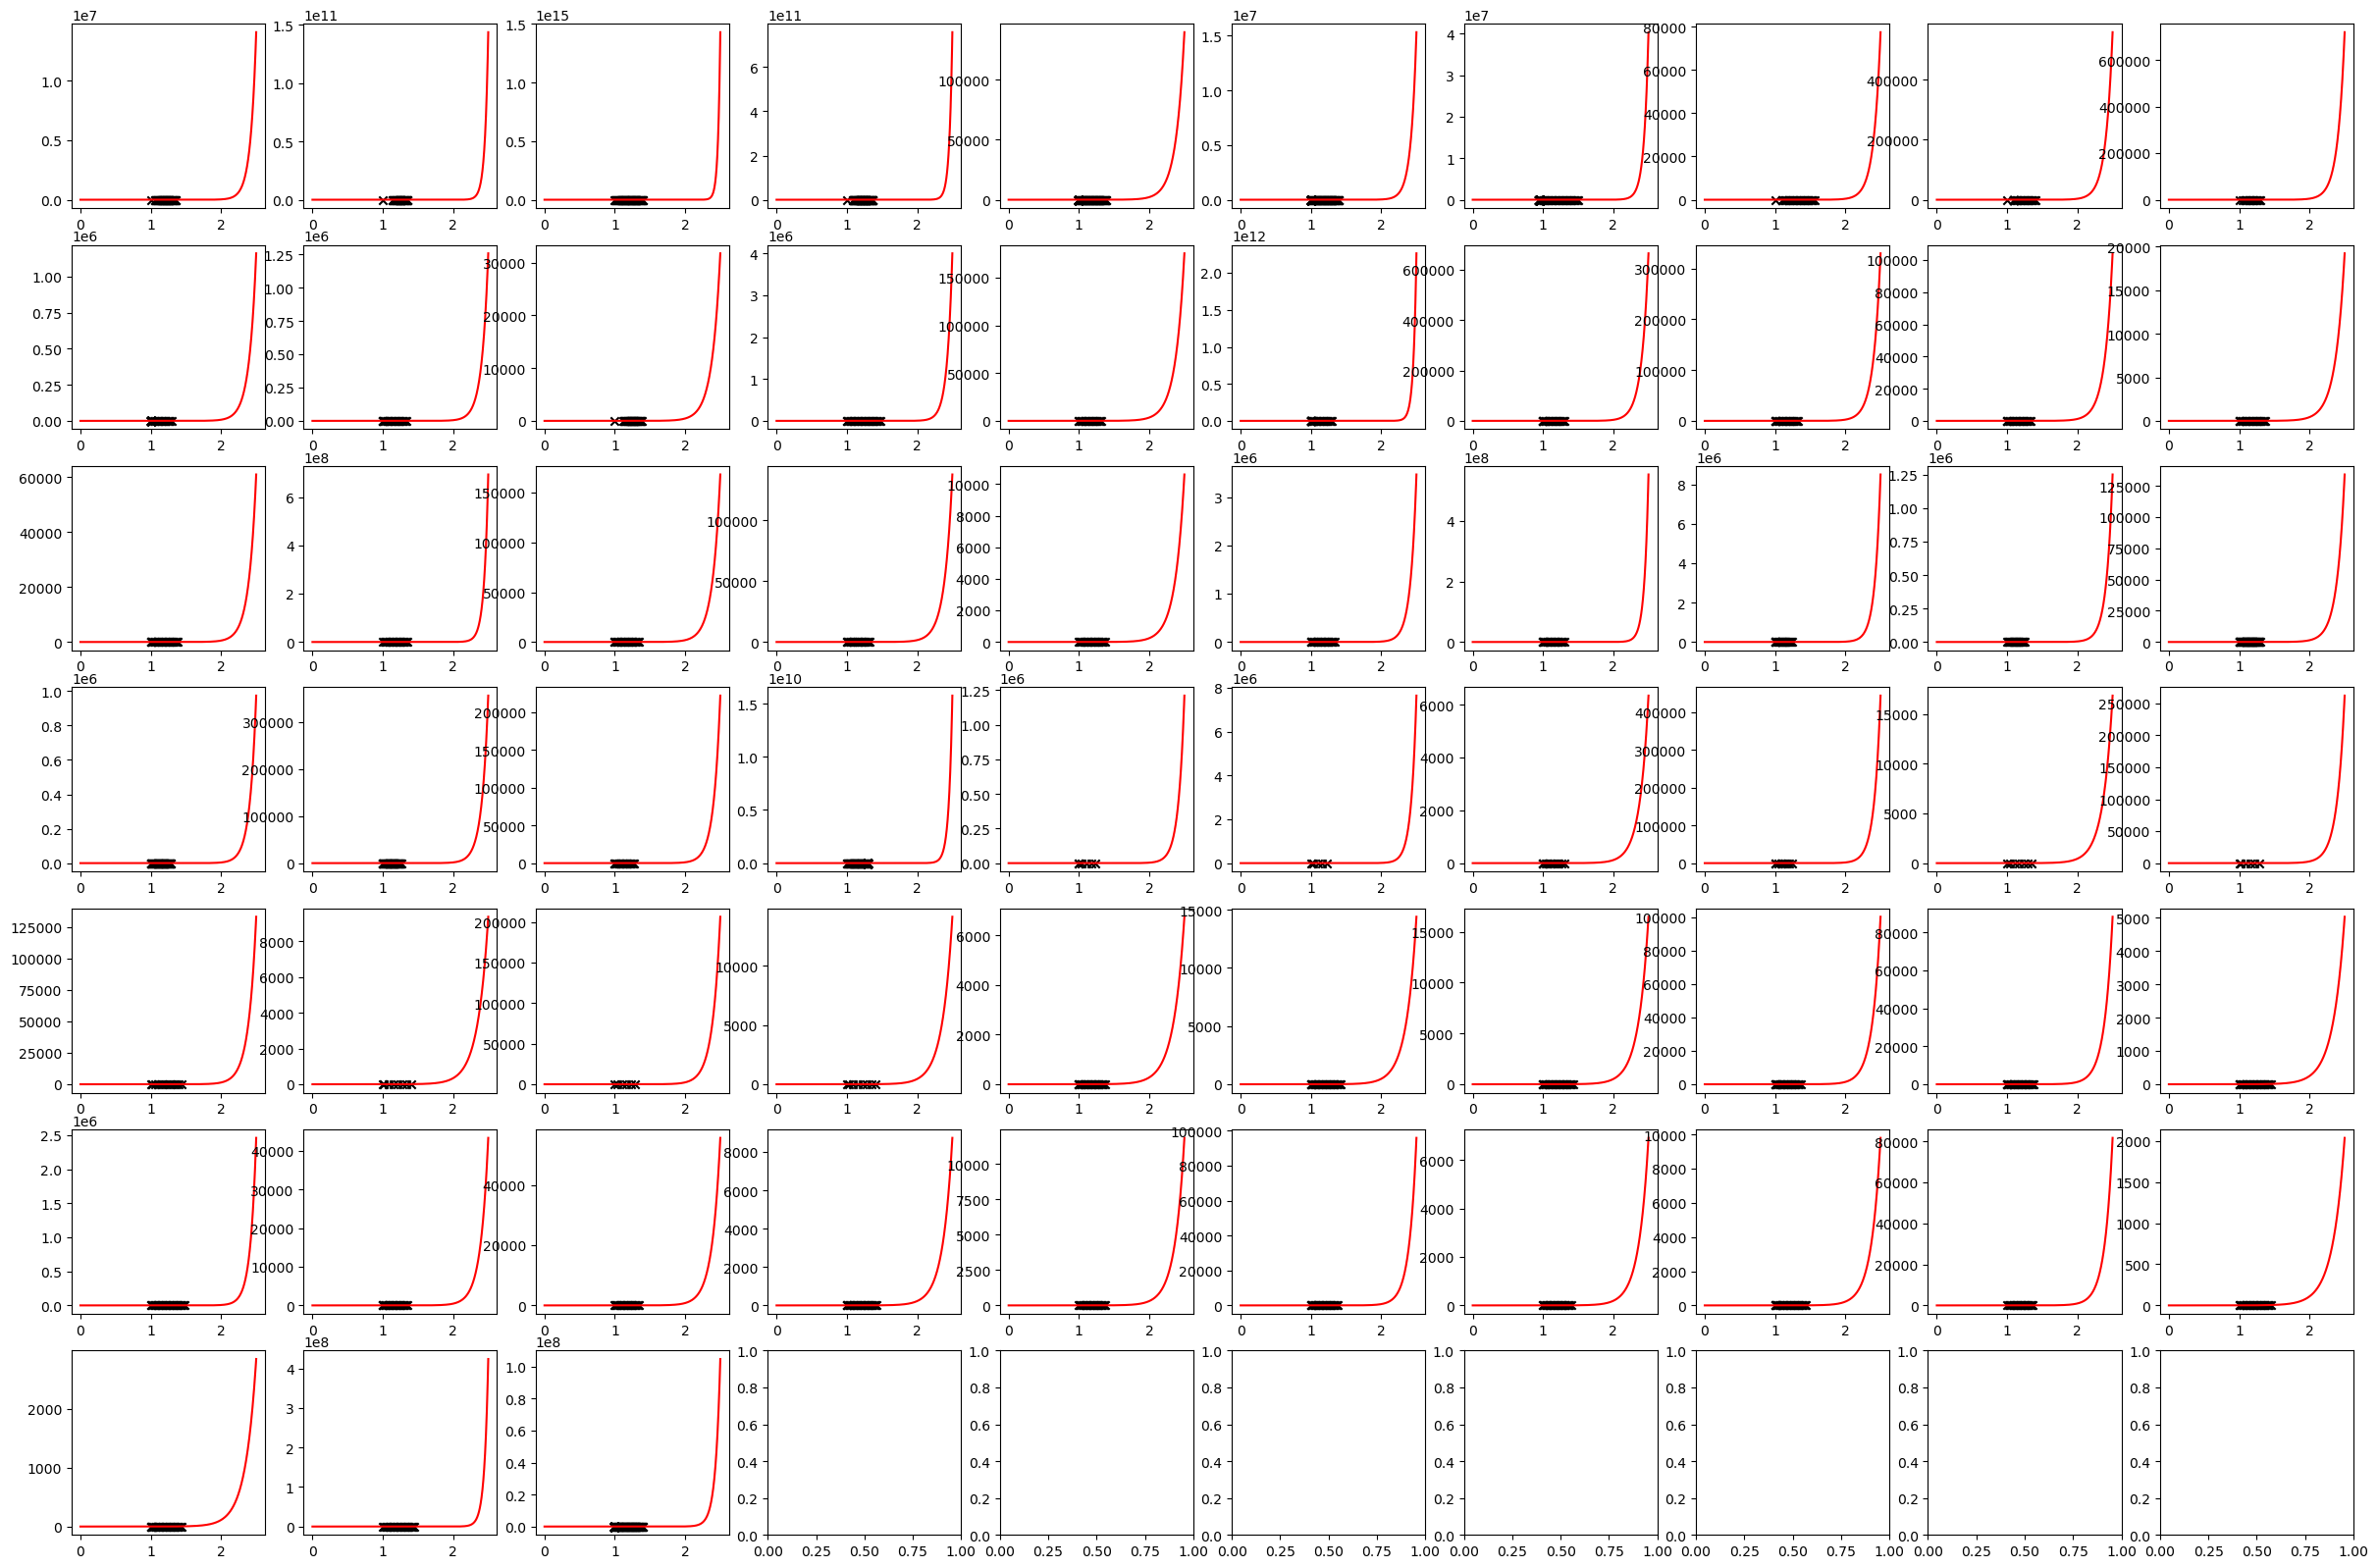

In [28]:
xls = pd.ExcelFile(file)

index_list =  []
G0_list = []
l_list = []

fig, axs = plt.subplots(7, 10, figsize=(30,20))
x = np.linspace(0, 2.5, 1000)


for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']

    popt, _ = curve_fit(strain_stress_exponential, x_data, y_data, p0=(1.78, 11.66), maxfev=10000)
    index_list.append(int(sheet))
    G0_list.append(popt[0])
    l_list.append(popt[1])

    ax.scatter(x_data, y_data, marker='x', color='black')
    ax.plot(x, strain_stress_exponential(x, *popt), 'r-')


data = {
    "index": index_list,
    "G0": G0_list,
    "l": l_list,
}

df = pd.DataFrame.from_dict(data)
print(df)

plt.show()
